In [ ]:
'''
1. Try to reproduce the graphs given in Figure 2.2 on page 23 of the textbook
2. Specifically, implement the -greedy method on the 10-armed bandit testbed, for different values of .
3. Ensure that you have labelled the graphs correctly.
'''

'''
Label the 
graphs clearly, with axes labels, parameter values, question numbers etc.
Ensure that the code is adequately commented. Also turn in a short write-up of your observations from the
experiments and answers to all the questions asked below.
'''

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
'''
The action values, q ∗ (a), a = 1, . . . , 10, were selected according to a normal (Gaussian) distribution
with mean 0 and variance 1. Then, when a learning method applied to that problem selected action A t at time step t,
the actual reward, R_t , was selected from a normal distribution with mean q ∗ (A_t ) and variance 1.
'''

In [3]:
'''
Initialization of expectation of arms
'''
q_a = np.zeros([10,2])
mu, sigma = 1, 1
for i in range(10):
    q_a[i][0] = np.random.normal(mu, sigma)
    q_a[i][1] = 0
print(q_a)
n = np.argmax(q_a, axis=0)
print(n[0])


[[ 0.17408078  0.        ]
 [ 0.02463817  0.        ]
 [-0.88593302  0.        ]
 [ 3.38865888  0.        ]
 [ 1.00719168  0.        ]
 [-0.67318364  0.        ]
 [ 1.74141322  0.        ]
 [ 2.43652236  0.        ]
 [ 0.09433201  0.        ]
 [ 1.60471526  0.        ]]
3


In [ ]:
'''
R_t is the reward obtained by pulling arm x at time t.
q_a[x] is the expected value of arm x at time t.
'''
R_t = np.random.normal(q_a[x],1)

In [95]:
'''
This was a set of 2000 randomly generated k-armed bandit
problems with k = 10
'''

steps = 1000
runs = 2000
epsilons = [0, 0.01, 0.05, 0.1, 0.2, 0.5]
k = 10
mean = 0
std_dev = 1

def bandit(epsilon, steps, runs, ):
    
    avg = np.zeros([steps])
    
    true_values = np.random.normal(mean, std_dev, (runs, k )) 
    #print(true_values)
    
    for i in range(runs):
        '''
        Initialize the expected values of each action to zero 
        '''
        exp_val = np.zeros([10,2])
            
        '''
        Pull the arms 2000 times by following epsilon-greedy approach
        '''
        rn = 0
        mx = 0
        
        for j in range(steps):
            num = np.random.uniform(0,1)
            
            if num<epsilon:
                random_arm = np.random.randint(0,10)   # pick a random arm
                reward = np.random.normal(true_values[i][random_arm],1)   # get the reward using the true expectation
                exp_val[random_arm][1] += 1   # increase the count of the arm
                exp_val[random_arm][0] = (exp_val[random_arm][0]*(exp_val[random_arm][1]-1) + reward)/exp_val[random_arm][1]   # average of the values of arm
                rn +=1
            else:
                max_arm = np.argmax(exp_val, axis = 0)    # get the max expectation 
                reward = np.random.normal(true_values[i][max_arm[0]],1)   # get reward using true distribution
                exp_val[max_arm[0]][1] += 1   # increase the count of arm
                exp_val[max_arm[0]][0] = ((exp_val[max_arm[0]][0])*(exp_val[max_arm[0]][1]-1) + reward)/exp_val[max_arm[0]][1] # average of the values of arm
                mx += 1
            avg[j] = avg[j]+reward # for each step add the reward obtained

    # print(exp_val)
    # print(mx, rn)
    avg = np.divide(avg,runs)
    
    return avg

data = []
for i in range(len(epsilons)):
    data.append(bandit(epsilons[i], 1000, 2000))



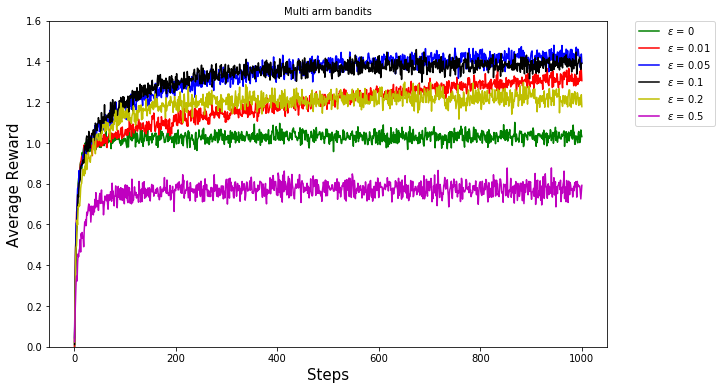

In [102]:
'''
For plotting average reward in case of epsilon-greedy method.
'''

fig = plt.figure(figsize=(10,6))

x = np.zeros([steps])
for i in range(1,steps+1):
    x[i-1] = i

# Plotting the data
colors = ['g', 'r', 'b', 'k', 'y','m']
for i in range(len(data)):
    plt.plot(x, data[i], colors[i], label = "$\epsilon$ = " + str(epsilons[i]) )

# Labelling the graph
plt.xlabel('Steps', fontsize = 15)
plt.ylabel('Average Reward', fontsize = 15)
plt.title('Multi arm bandits', fontsize = 15)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylim(0, 1.6)


plt.show()

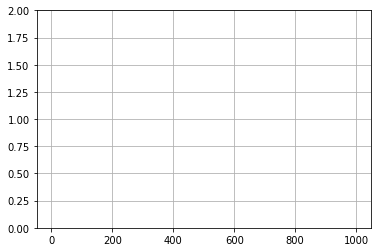

In [165]:
fig, ax = plt.subplots()
ax.plot(x,avg)
ax.grid(True)
# ax.set_xlim(0, steps)
ax.set_ylim(0, 2);